# Open Food Facts Nutrition

![title](nutriscore.png)


# Introduction 

<br> 

Nowadays, it is really important to know how to eat healthy and in a good way for the environment. 

Today, we will explore the dataset Open Fact Food which is a food products database.

There are informations on ingredients, nutritional information, labels etc...
Data comes from crowdsourcing, a data made by everyone, for everyone.

## 1) Dataset Description 

<br> 

We will use the Open Food Facts data set (https://world.openfoodfacts.org/data) which is an open source database. It provides nutrition facts for food products sold in each country and all nutrition information we need. This databse contains more than 100 000 records, and all of the contents are provided by volunteers. Moreover, the entire database is free to download.

<br>

The dataset has five main fields: 

- **Generalities:** 

    Field related to the general information such as the name of the product, the contributor who added the product, the barcode and the url of the product.

<br>

- **Tags :**

    There are some informations related to the brands or packaging of the products.

<br>

- **Ingredients:**

    List of ingredients of the products.

<br>

- **Misc.**

    We have extra information such as image of the product, number of food additives or ingredients from palm oil, carbon footprint (indiicated on some product).

<br>

- **Nutrition Facts:**

    It corresponds to the amount of a nutrient(in g or kJ for energy) for 100g or ml of product. We also have the nutrition score defined by UK Food Standards Adminitration (FSA). The french nutrition score is derived from the UK FSA score and adapted for the French market.

### Import Libraires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import missingno as msno
warnings.filterwarnings("ignore")
import matplotlib.style as style
from IPython.display import Image

### Import data 

In [2]:
df = pd.read_csv('en.openfoodfacts.org.products.tsv',sep="\t",low_memory = False)

In [3]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replace the columns 

We replace all - by _ for each columns

In [4]:
# Using list comprehension
df.columns = [col.replace("-","_")for col in df.columns]

### Shape Df  

In [5]:
df_size = df.shape
nb_rows = df_size[0]
nb_columns= df_size[1]
print(f"Number of rows: {nb_rows}")
print(f"Number of columns: {nb_columns}") 

Number of rows: 356027
Number of columns: 163


In this dataset we have 356027 products, and for each it has maximum 163 informations about it.

In [6]:
df.info(verbose=True) # verbose to print all data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 163 columns):
code                                          object
url                                           object
creator                                       object
created_t                                     object
created_datetime                              object
last_modified_t                               object
last_modified_datetime                        object
product_name                                  object
generic_name                                  object
quantity                                      object
packaging                                     object
packaging_tags                                object
brands                                        object
brands_tags                                   object
categories                                    object
categories_tags                               object
categories_en                           

## Feature Engineering 

### Data Cleaning : Analyses of Missing Values

In [7]:
df.isnull().sum()

code                           26
url                            26
creator                         3
created_t                       3
created_datetime               10
                            ...  
carbon_footprint_100g      355749
nutrition_score_fr_100g    101171
nutrition_score_uk_100g    101171
glycemic_index_100g        356027
water_hardness_100g        356027
Length: 163, dtype: int64

We saw that we have a lot of missing values in this dataset.

#### Rate of Missing Values

Let's calculate the rate of the missing values 

In [8]:
missing_value_rate = df.isnull().sum().sum() / df.size
missing_value_rate

0.7613589691041733

We have 76% of missing values in our dataset, which is tremendous.

#### Analyse the rate of NaN per columns

Let's analyse the rate of missing values per columns 

In [9]:
missing_value_rate_col = df.isnull().sum().sort_values(ascending=False) / nb_rows
missing_value_rate_col

water_hardness_100g       1.000000
no_nutriments             1.000000
_lignoceric_acid_100g     1.000000
_cerotic_acid_100g        1.000000
_melissic_acid_100g       1.000000
                            ...   
created_datetime          0.000028
created_t                 0.000008
creator                   0.000008
last_modified_datetime    0.000000
last_modified_t           0.000000
Length: 163, dtype: float64

Here, 1 means we have 100% of the data so there is no missing values. On the contrary, 0.000028 means that we have more than 99% of missing values which is very bad.

<BarContainer object of 163 artists>

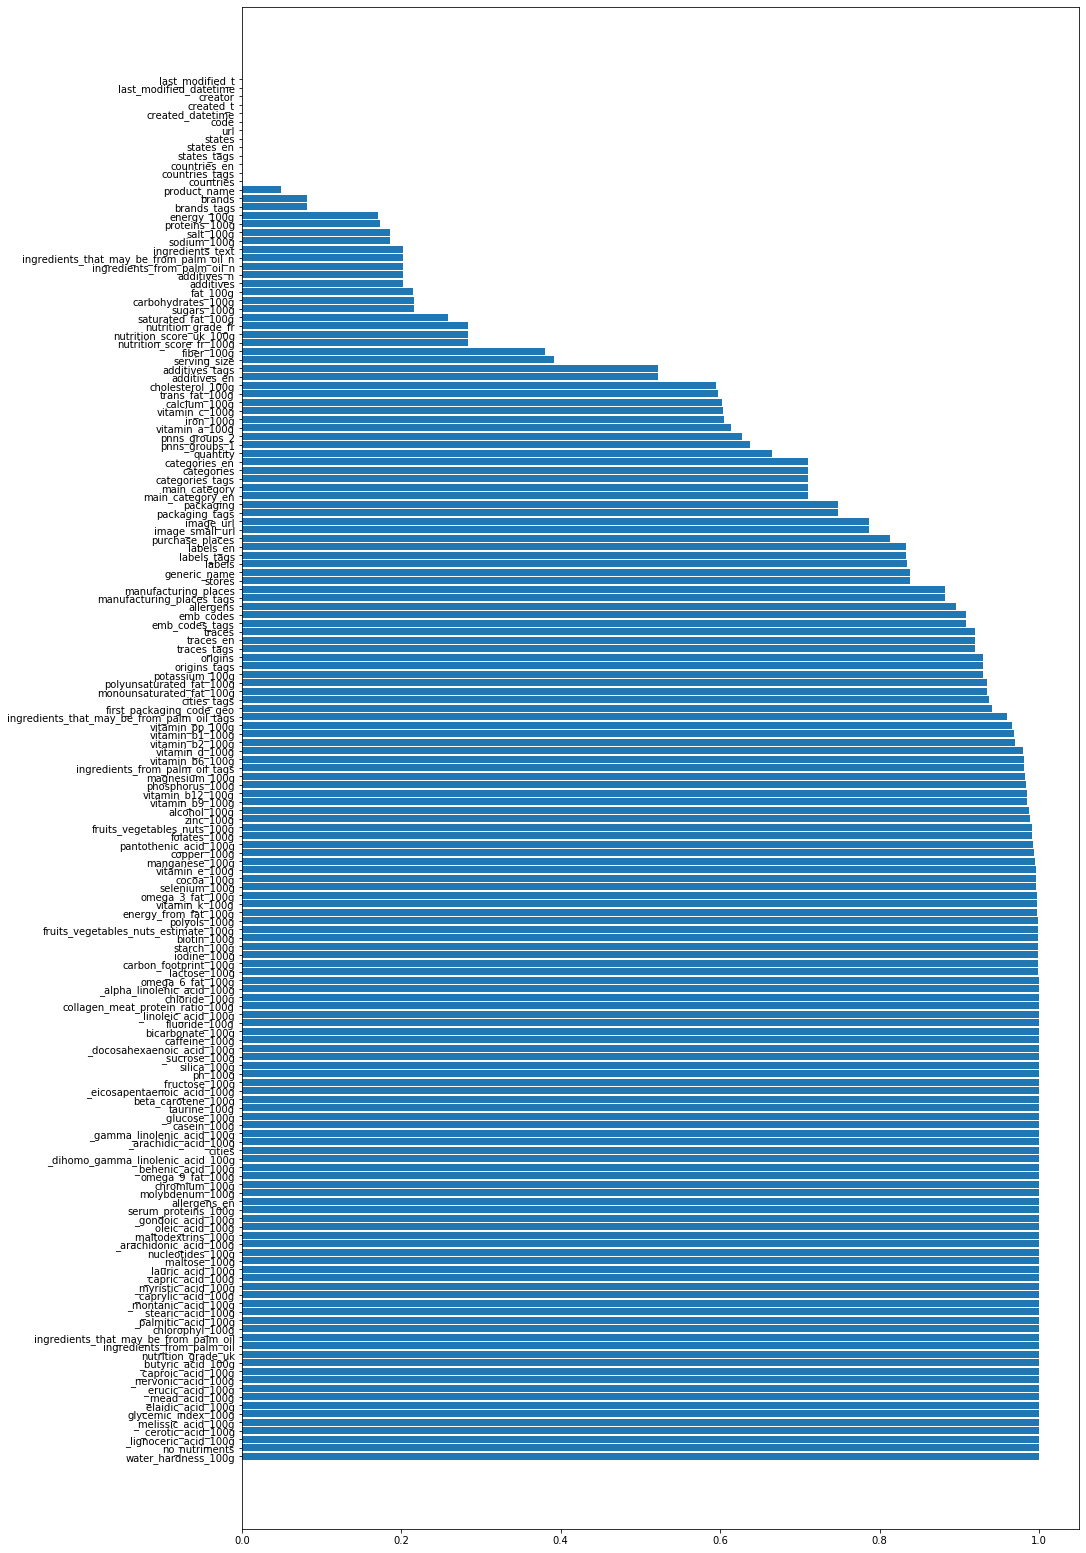

In [10]:
plt.figure(figsize=(15,28))
plt.barh(missing_value_rate_col.index, missing_value_rate_col.values)

We made a horizontal bar plot to visualize the rate of missing values, we see that more than 50% of the variables have more than 80% missing values. 

### Drop Columns with High Rate of Missing Values 

In [11]:
col_drop = missing_value_rate_col[missing_value_rate_col>0.5].index
df.drop(columns=col_drop, inplace=True)
df.shape

(356027, 34)

####  Visualize Missing Values with MSNO

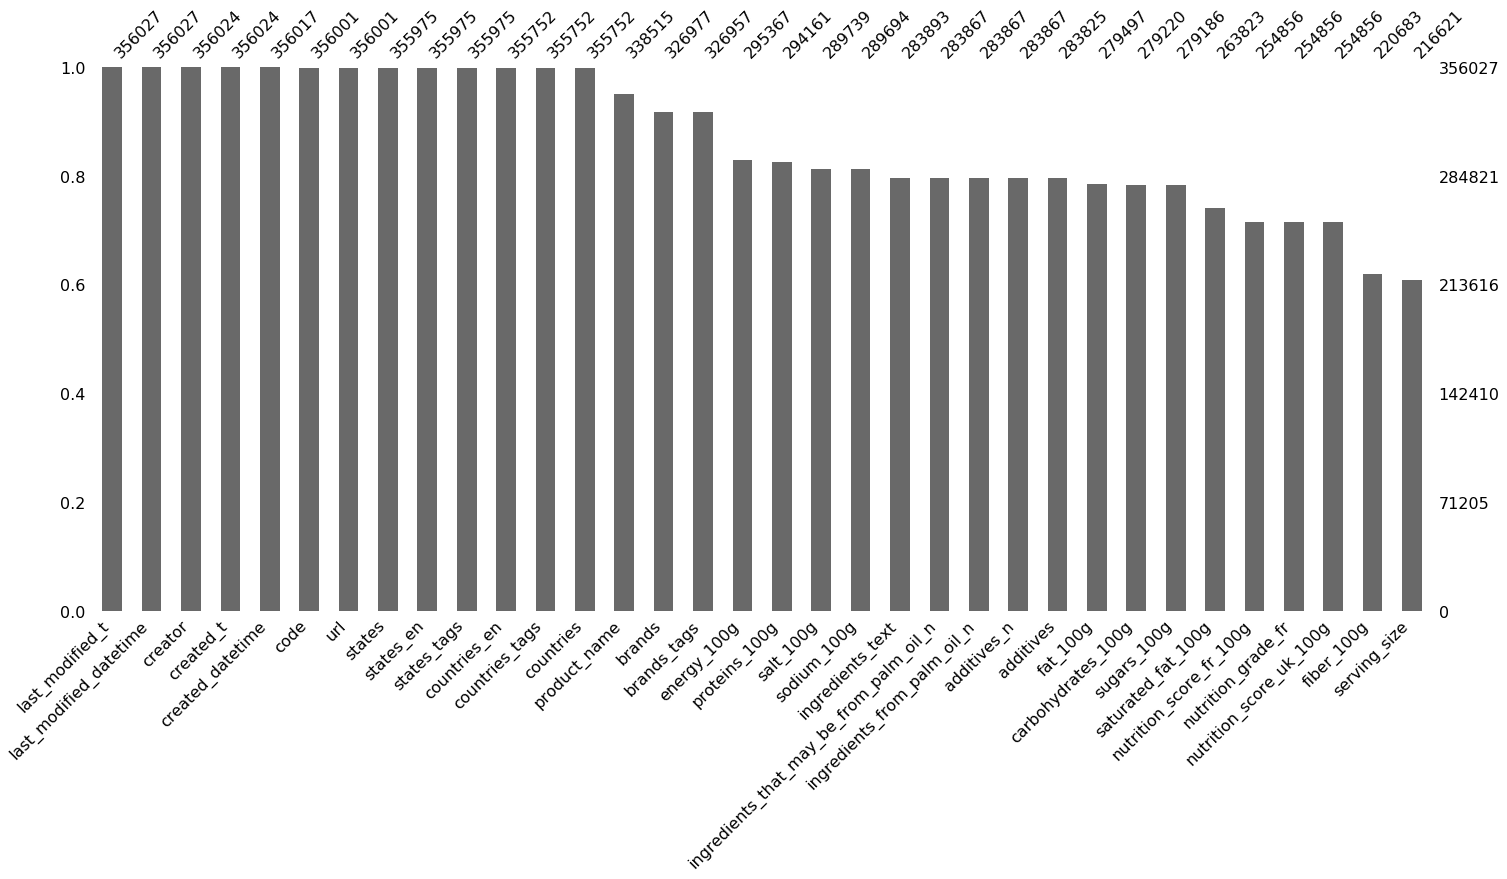

In [12]:
# MSNO Bar plot 
msno.bar(df,labels=True, sort="descending")

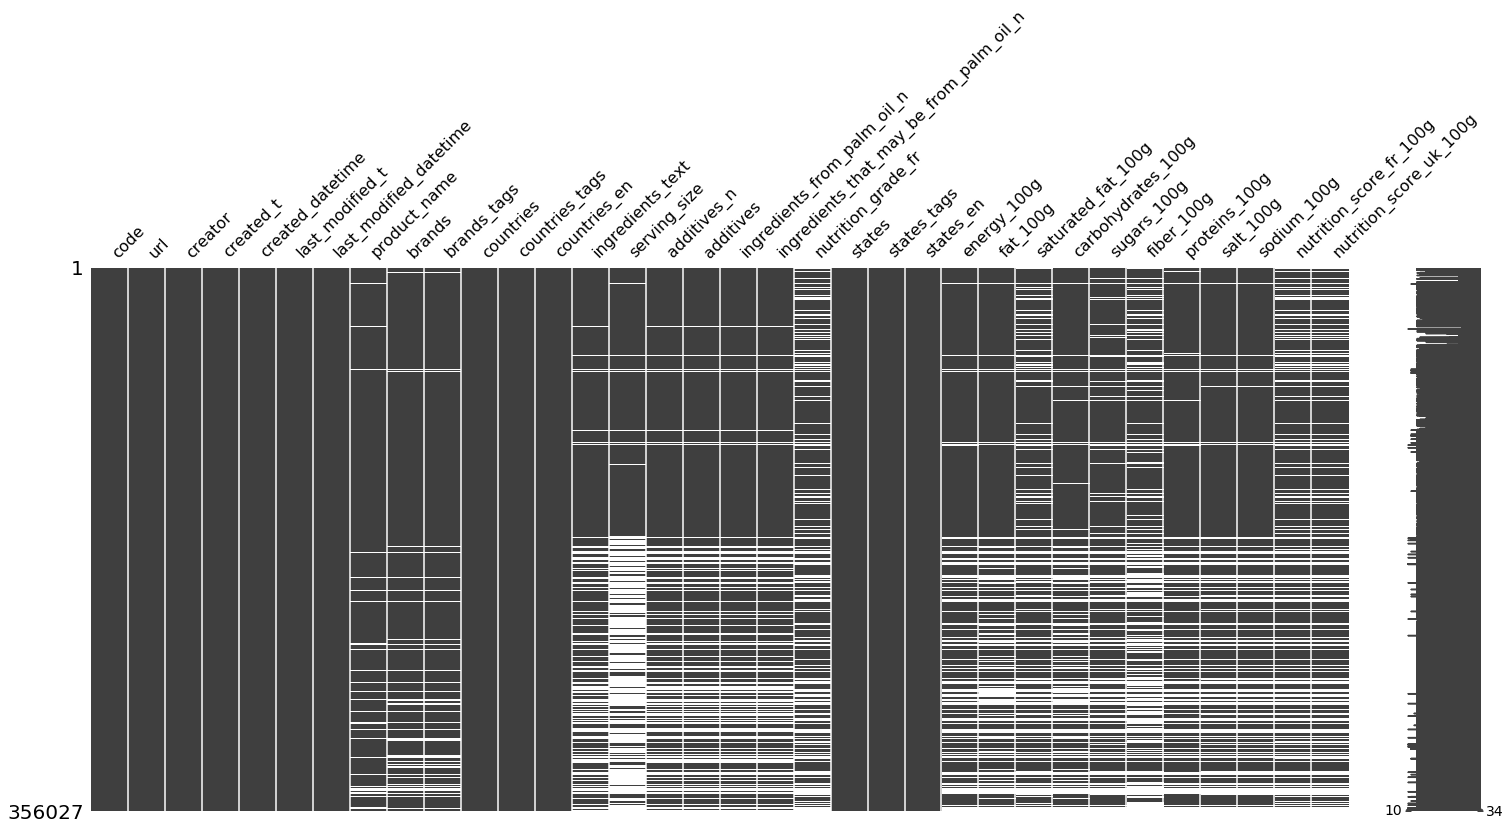

In [13]:
msno.matrix(df)

The white lines are the rows with missing values. We should clean it.

### Drop Rows with High Rate of Missing Values

In [14]:
df["taux_remplissage"] = df.notnull().sum(axis=1) / df.shape[1]

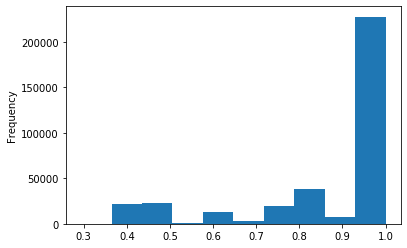

In [15]:
df.taux_remplissage.sort_values().plot(kind="hist")

In [16]:
df = df[df.taux_remplissage>0.4] 
df.drop(columns=["taux_remplissage"],inplace=True)
df.shape

(343614, 34)

We select only rows with more than 60% of values (it means that we drop all rows with more than 40% of missing values).


### Cleaning Data : Looking for outliers

In [17]:
df_clean = df.copy(deep=True)

In [18]:
col_exclu = ["nutrition_score_fr_100g","nutrition_score_uk_100g","energy_100g"]
# Create list of nutriments with list comprehension, we want only nutrients but not the nutrition score & energy
nutriments= [col for col in df.columns if col.endswith("_100g") and col not in col_exclu]
nutriments

['fat_100g',
 'saturated_fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

### Energy Distribution

<br>

First, let's look at the Energy Distribution 

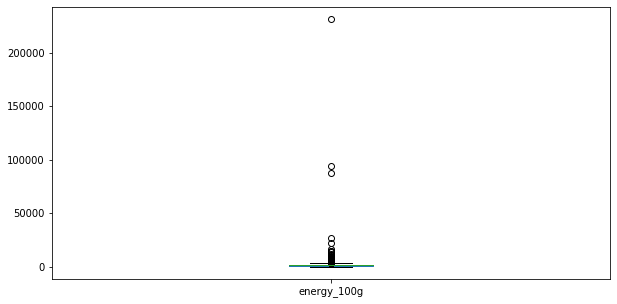

In [19]:
df.energy_100g.plot.box(figsize=(10,5))

We have more than 200 000 kJ, so we look at which nutrients provides the most energy ? 

We verified https://en.wikipedia.org/wiki/Food_energy, and we see that the fat provides 37 kJ per g, so for 100g we have 3700 kJ, it is impossible to exceed 200 000 kJ for a product. 
So we have outliers !

Let's drop all rows where the energy is less than 0 and more than 3700 kJ ! 

In [20]:
df_clean = df_clean[(df_clean.energy_100g>0)& (df_clean.energy_100g <3700)]
print('df shape before cleaning:',df.shape,'\ndf shape after cleaning: ', df_clean.shape)

df shape before cleaning: (343614, 34) 
df shape after cleaning:  (284876, 34)


#### Visualize the distribution of Energy 

[Text(0.5, 1.0, 'Energy Distribution After Cleaning')]

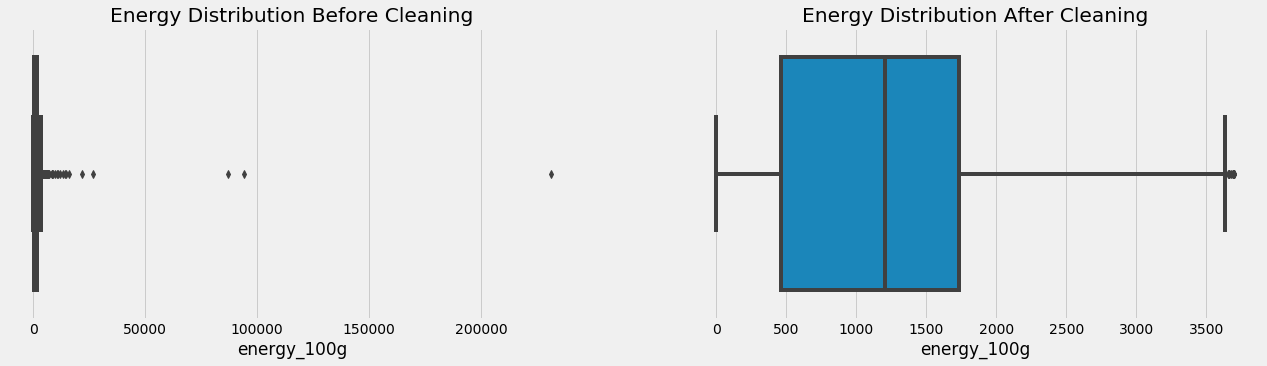

In [66]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(df.energy_100g,ax= axes[0]).set(title="Energy Distribution Before Cleaning")
sns.boxplot(df_clean.energy_100g,ax= axes[1]).set(title="Energy Distribution After Cleaning")

We saw that the distribution is homogeneous.

### Nutrition Score Distribution

[Text(0.5, 1.0, 'Nutrition Score UK ')]

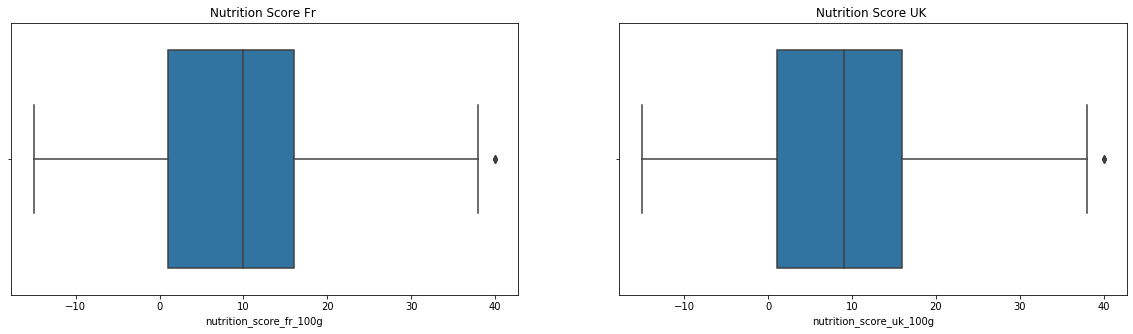

In [22]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
sns.boxplot(df.nutrition_score_fr_100g,ax= axes[0]).set(title="Nutrition Score Fr ")
sns.boxplot(df.nutrition_score_uk_100g,ax= axes[1]).set(title="Nutrition Score UK ")

The distribution of nutrition score for fr and uk seems to be good.

### Nutriments Distribution

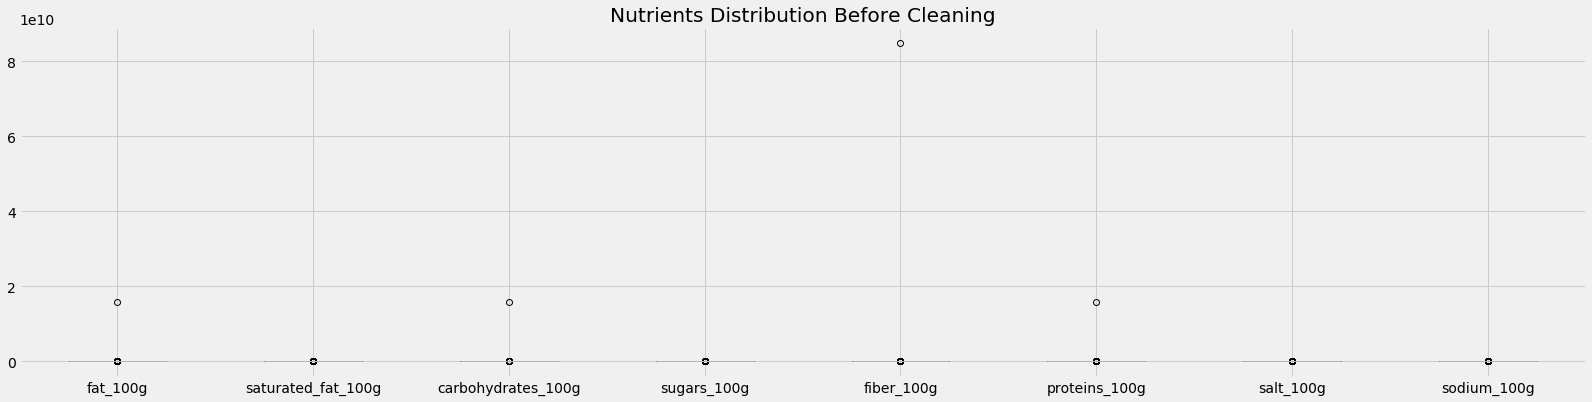

In [64]:
df.boxplot(column=nutriments, figsize=(25,6))
plt.title("Nutrients Distribution Before Cleaning")
plt.show()

We see that some nutrients have more than 100g which is not normal based on the dataset description. 

In [24]:
for col in nutriments:
    df_clean =  df_clean.query(f"{col}>= 0 and {col} <= 100")
    print(col,": ", df_clean.shape)

fat_100g :  (268188, 34)
saturated_fat_100g :  (243870, 34)
carbohydrates_100g :  (243344, 34)
sugars_100g :  (237903, 34)
fiber_100g :  (196496, 34)
proteins_100g :  (196132, 34)
salt_100g :  (195392, 34)
sodium_100g :  (195387, 34)


We clean each nutrients, we take values only between 0 & 100 g.

Text(0.5, 1.0, 'Nutrients Distribution After Cleaning')

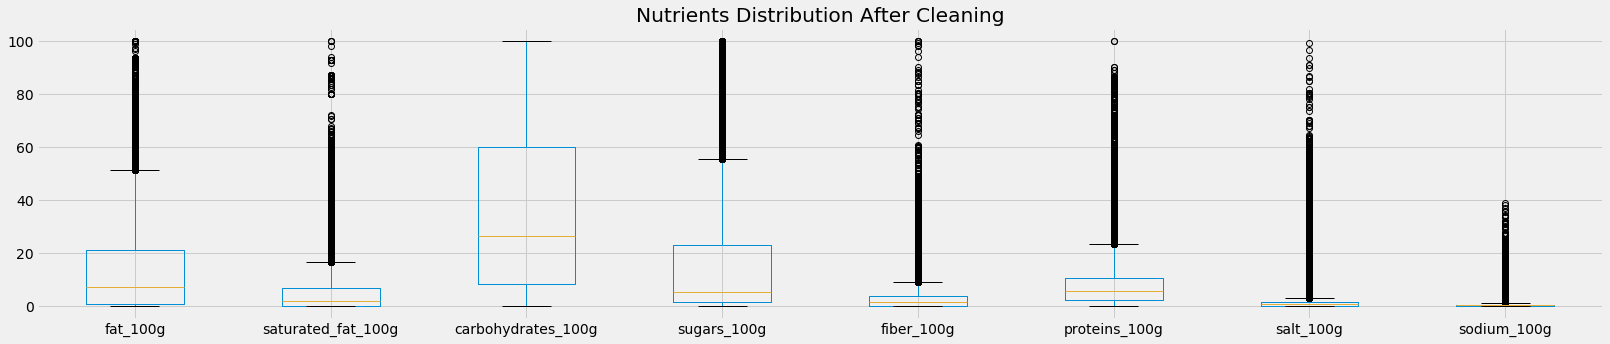

In [65]:
df_clean.boxplot(column= nutriments,figsize=(25,5))
plt.title("Nutrients Distribution After Cleaning")

### Countries Distribution 

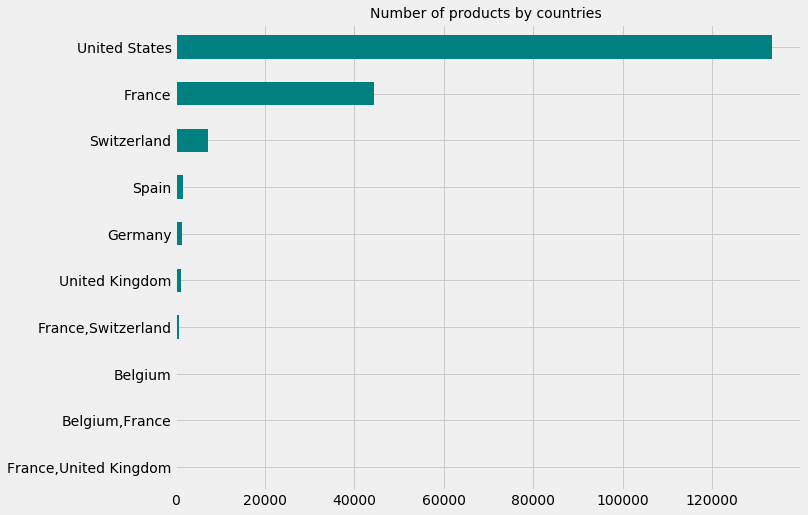

In [26]:
style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
ax=df_clean['countries_en'].value_counts()[:10].plot(kind='barh',color='teal')
ax.invert_yaxis()
ax.set_title("Number of products by countries ",{'fontsize':14})
plt.show()

We see that the product in this dataset are not equally distributed trought the different countries. It is something we have to keep in mind because deppending on the countries, the composition of product are not the same.

Also, since the products comes mostly from France or United-States, the brand in the dataset mostly are french brands or united states brands.

### Problematic / Select Data  

With all the information we've seen inside this data set, we decided to forcus on two aspect : brands and health.

Thus we can ask : **What are the brands that provide the healthies product to the world ?**

First we will define what is healthy for us.
Then according to those criterias, we will rank the different brands.

# 2) Healthy 

## Definition 

**Healthy Product**

A product is defined 'healthy', by the amount of healthy nutrients it has. 

<br>

**Nutrition Score**

The Nutrition Score is determined by the amount of healthy and unhealthy nutrients.

We have 2 categories :

**Negative points (corresponding to the favourable components) :** the proportion of fruits, vegetables pulses, nuts, walnuts, of olive, colza and nut oils, of fibers and proteins (high levels are considered good for health).

**Positive points (corresponding to the unfavourable components):** energy, sugars, sodium and saturated fatty acid (excess is considered unhealthy). 

<br>

Based on these points, between 0-10 points are awarded for each of these 4 unfavourable components (sugars, sodium, ernegy, saturated fatty acid) based on the amount in 100g of food. 

The maximum total points is 40 which is very unhealthy product (Nutrition Grade E).

<br>

Between 0-5 points are awarded for each of these 3 favourable components (Fibers, Proteins and fruits, vegetables, pulses, nuts, walnuts, olive oils), based on the amount in 100g of food. 

The maximum total poitns is -15 which is the most healthy product (Nutrition Grade A).

<br>

![title](Score_Points.png)

<br>

We see that the impact of the elements are less visible because the points ratio is smaller (Maximum 0-5).

## Selection of data according to the problematic

Since we will focus on brands, the nutrition score and the nutrigrade, we decided to keep only certain data.

To calculate the nutrition score, you need to have certain informations about the composition of the product (according to the dataset documentation) that are :
* energy
* sugars
* saturated fatty acids
* sodium (salt)
* fruits, vegetables, pulses, nuts, rapeseed, walnut, olive oils
* fibers
* proteins

Unfortunatly, we don't have enough data on fruits, vegetables ... to keep the data, so we will only study the rest of the composition.

We decided to keep two other informations on the producst that are if ingredient contains palm oil or not and the number of additive in a product. We think they are two important factor even if they don't enter in the computation of the nutriscore.

In [27]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'states', 'states_tags', 'states_en', 'energy_100g', 'fat_100g',
       'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition_score_fr_100g',
       'nutrition_score_uk_100g'],
      dtype='object')

In [28]:
columns_selected = ['product_name','brands','brands_tags','additives_n','ingredients_that_may_be_from_palm_oil_n','ingredients_from_palm_oil_n','nutrition_grade_fr','energy_100g','fat_100g','saturated_fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g','nutrition_score_uk_100g']
df_study = df_clean[columns_selected]
df_study.columns

Index(['product_name', 'brands', 'brands_tags', 'additives_n',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 'energy_100g',
       'fat_100g', 'saturated_fat_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition_score_uk_100g'],
      dtype='object')

## Correlation Between Variables 

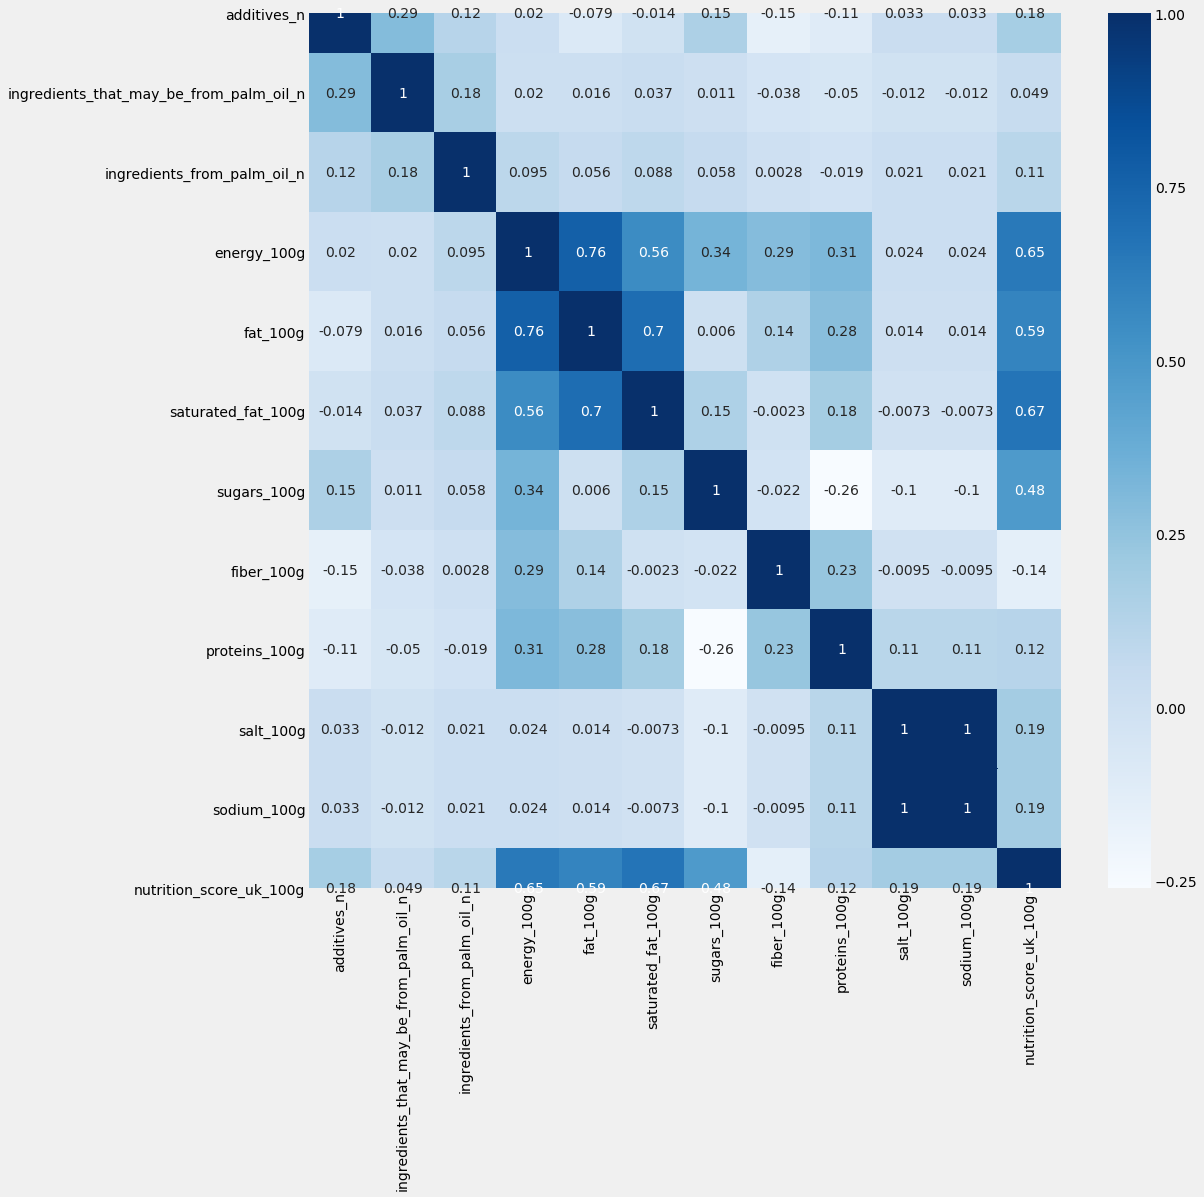

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(df_study.corr(),cmap='Blues',annot=True)
plt.show()

Using heatmap, we can see the correlation between variables, first we see that the energy, fat, saturated fat and sugars are related to the nutrition score uk. Next, we see that the energy is strongly related to the fat and the the saturated fat. 

## Positive Points 

In [30]:
df_study = df_study.sort_values(by='nutrition_grade_fr',ascending=True)

### Saturated Fat

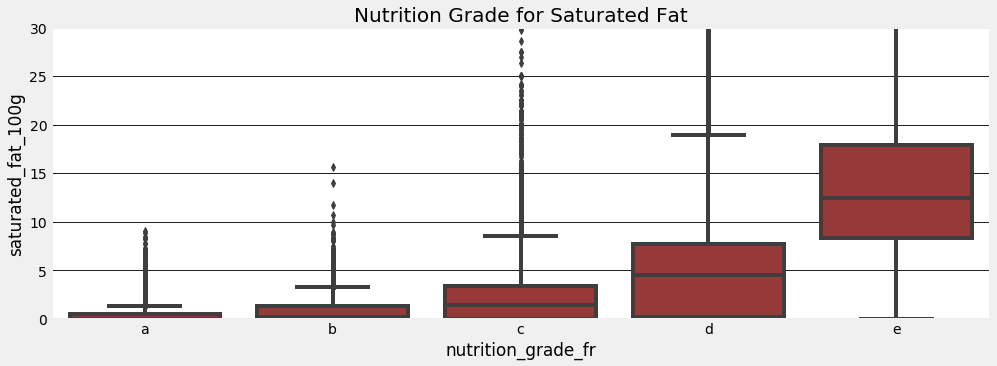

In [31]:
plt.figure(figsize=(15, 5)) 
plt.rc('grid', color='#202020') 
plt.rc('axes', facecolor='white')
plt.rc('text', color='black')
plt.ylim(0, 30)
plt.title("Nutrition Grade for Saturated Fat", fontsize =20, color = 'black')
sns.boxplot(data=df_study, x="nutrition_grade_fr",y='saturated_fat_100g', color='brown')
plt.show()

Here we see that the more we have saturated fat the more we have positive points, so the score is very bad (E) for the products with the most saturated fat. On the contrary, we have a good grade (A) for the products with few saturated fat.

### Energy

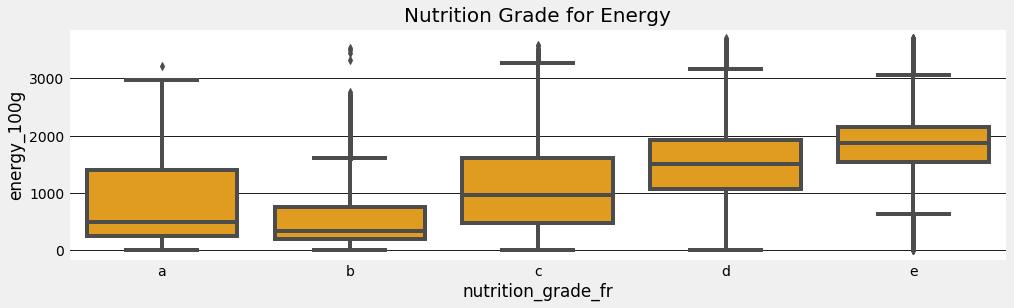

In [32]:
plt.figure(figsize=(15, 4)) 
plt.rc('grid', color='#202020') 
plt.rc('axes', facecolor='white')
plt.rc('text', color='black')
sns.boxplot(data=df_study, x="nutrition_grade_fr",y='energy_100g', color='orange')
plt.title("Nutrition Grade for Energy", fontsize =20, color = 'black')
plt.show()

The unhealthy product has the most of energy but some healthy product has some energy, in general, product graded A has more energy than product graded B. So the energy is not decisive, but we can notice that nutrients such as fat and saturated are correlated with energy, so products with the most energy can be product with the most saturated fat or fat.  

### Sugars 

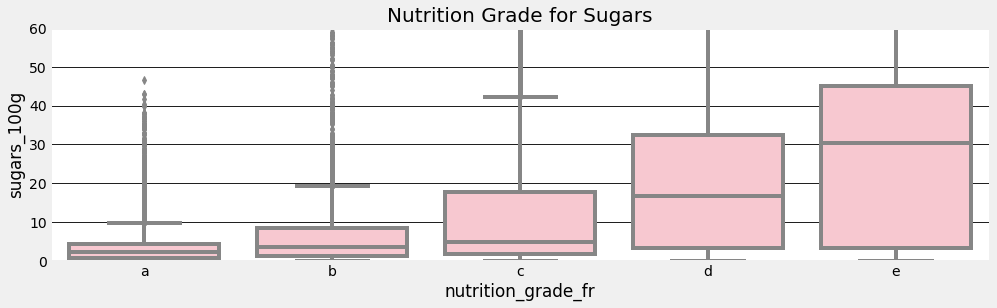

In [33]:
plt.figure(figsize=(15, 4)) 
plt.rc('grid', color='#202020') 
plt.rc('axes', facecolor='white')
plt.rc('text', color='black')
plt.ylim(0, 60)
sns.boxplot(data=df_study, x="nutrition_grade_fr",y='sugars_100g', color='pink')
plt.title("Nutrition Grade for Sugars", fontsize =20, color = 'black')
plt.show()

Sugars has a considerable impact on the grade, the products with very few or no sugars are considered as the healthiest and the products with a lot of sugars are the unhealthiest.

### Sodium 

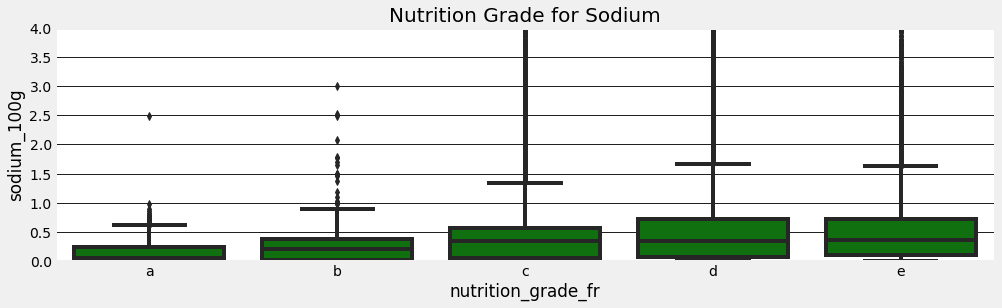

In [34]:
plt.figure(figsize=(15, 4)) 
plt.rc('grid', color='#202020') 
plt.rc('axes', facecolor='white')
plt.rc('text', color='black')
plt.ylim(0, 4)
sns.boxplot(data=df_study, x="nutrition_grade_fr",y='sodium_100g', color='green')
plt.title("Nutrition Grade for Sodium", fontsize =20, color = 'black')
plt.show()

There are not a lot of sodium for a product of 100g so it's difficult to see the difference, but the product with the least sodium are graded healthy. 

### Fat 

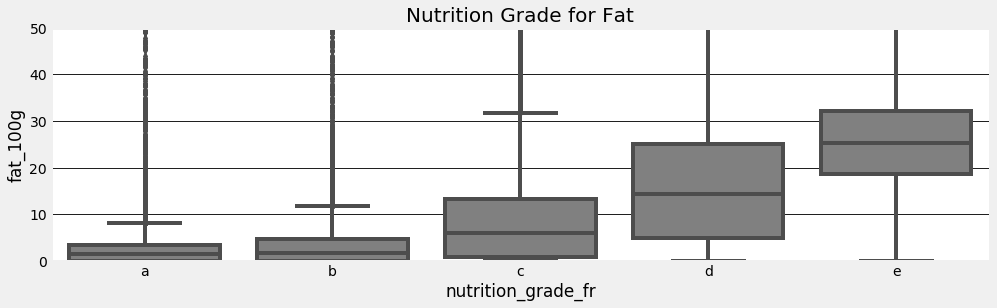

In [35]:
plt.figure(figsize=(15, 4)) 
plt.rc('grid', color='#202020') 
plt.rc('axes', facecolor='white')
plt.rc('text', color='black')
plt.ylim(0, 50)
sns.boxplot(data=df_study, x="nutrition_grade_fr",y='fat_100g', color='grey')
plt.title("Nutrition Grade for Fat", fontsize =20, color = 'black')
plt.show()

The fat has great impact on the nutrition grade, the products with the most fat are the unhealthiest whereas the products with the least fat are the healthiest.

## Negative Points

### Proteins

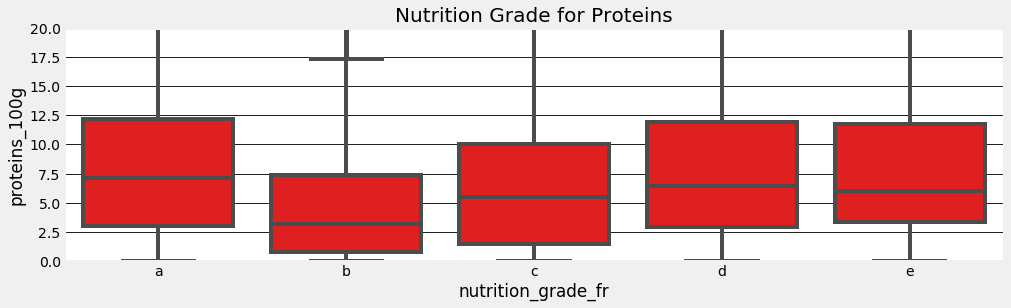

In [36]:
plt.figure(figsize=(15, 4)) 
plt.rc('grid', color='#202020') 
plt.rc('axes', facecolor='white')
plt.rc('text', color='black')
plt.ylim(0, 20)
sns.boxplot(data=df_study, x="nutrition_grade_fr",y='proteins_100g', color='red')
plt.title("Nutrition Grade for Proteins", fontsize =20, color = 'black')
plt.show()

We see that there is not a big difference between grade A and E for the proteins. It seems that the proteins doesn't impact a lot the grade.

### Fibers

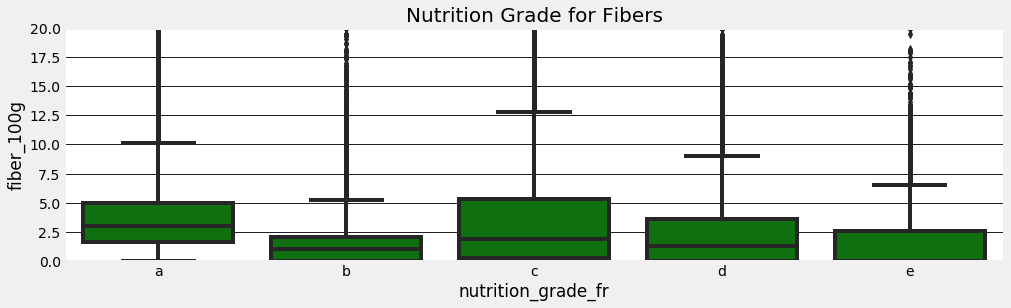

In [37]:
plt.figure(figsize=(15, 4)) 
plt.rc('grid', color='#202020') 
plt.rc('axes', facecolor='white')
plt.rc('text', color='black')
plt.ylim(0, 20)
sns.boxplot(data=df_study, x="nutrition_grade_fr",y='fiber_100g', color='green')
plt.title("Nutrition Grade for Fibers", fontsize =20, color = 'black')
plt.show()

Same as the proteins, it's difficult to see if there is any impact on the health. 

### Additives

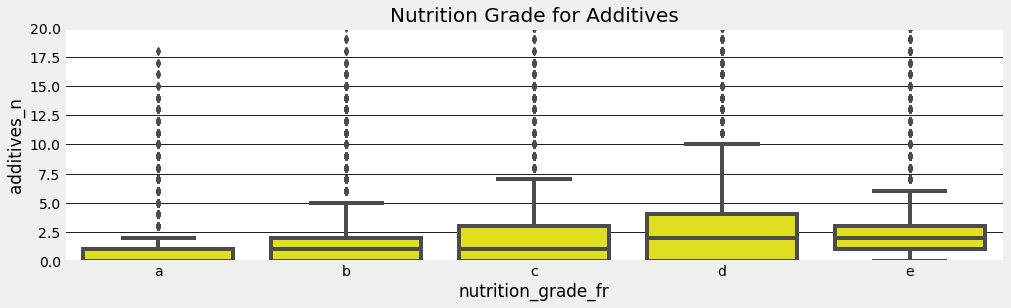

In [38]:
plt.figure(figsize=(15, 4)) 
plt.rc('grid', color='#202020') 
plt.rc('axes', facecolor='white')
plt.rc('text', color='black')
plt.ylim(0, 20)
sns.boxplot(data=df_study, x="nutrition_grade_fr",y='additives_n', color='yellow')
plt.title("Nutrition Grade for Additives", fontsize =20, color = 'black')
plt.show()

We can notice that the additives is not used for the calculation of the nutriscore but the additives are generally unhealthy.

Let's have a look if we compare the products with additives for the nutrition grade.

In general, products with few additives are healthier than products with a lot of additives. 

### Number of additives in Food

<br>

Let see how many additives we have in the food.

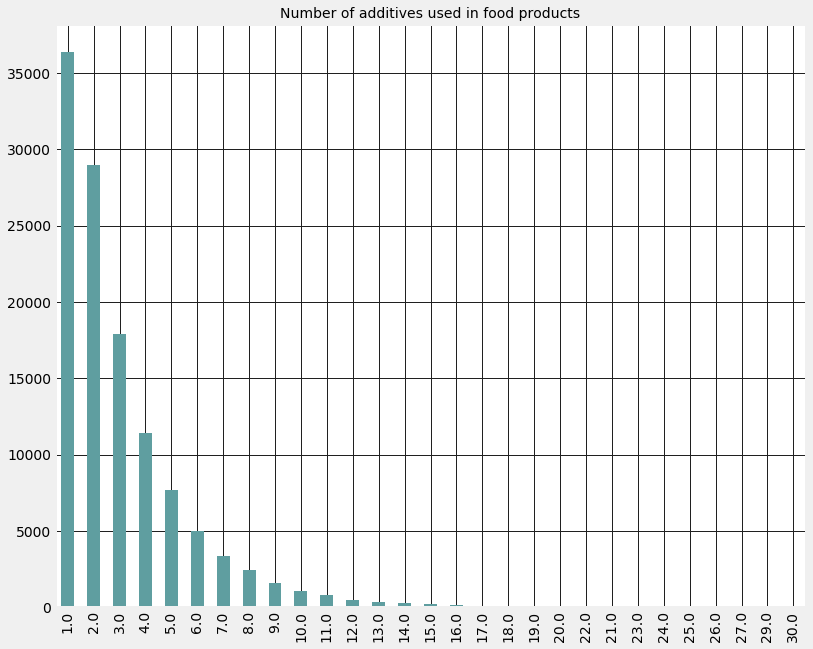

In [39]:
plt.figure(figsize=(12,10))
df_study[df_study['additives_n'] > 0.0]['additives_n'].value_counts().plot(kind='bar',color='cadetblue')
plt.title('Number of additives used in food products',fontsize=14)
plt.show()

Most of the products have 1 or 2 additives, but it is worrying that some products contains more than 10 additives...

# 3) Ranking & Criterias 

## Number of products per brand

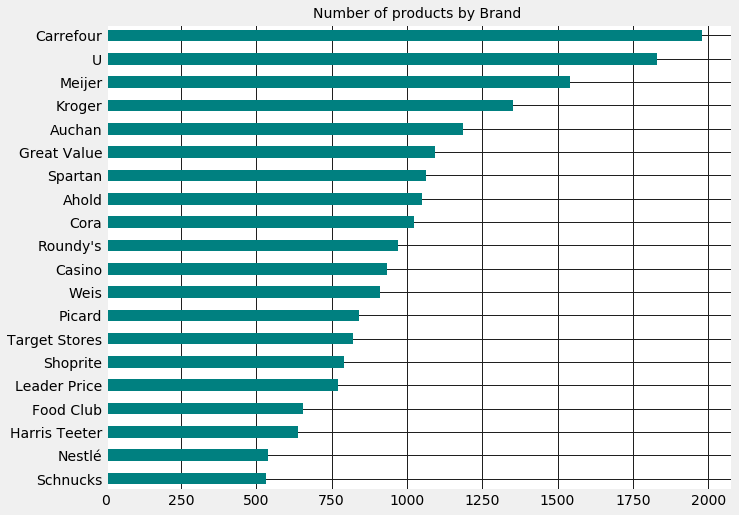

In [40]:
plt.figure(figsize=(10,8))
ax=df_study['brands'].value_counts()[:20].plot(kind='barh',color='teal')
ax.invert_yaxis()
ax.set_title("Number of products by Brand ",{'fontsize':14})
plt.show()

We see that the number of product per brands is not the same. So in our analysis we need to be careful.

We decided to analyse the mean of each information when it is possible so that it keeps everything at the same scales.

## Ranking According to Nutriscore

In [41]:
overhund = (df_study['brands'].value_counts() >100)
overhund = overhund.where(overhund==True)
overhund = overhund.dropna()
listbrandhund = overhund.index.tolist()
len(listbrandhund)
df_big_mask = df_study['brands'] == listbrandhund.pop()
for b in listbrandhund :
    df_big_mask |= df_study['brands'] == b
df_big_mask
df_big = df_study[df_big_mask]
df_big.size

859792

In [42]:
overfifty = (df_study['brands'].value_counts() >50)
overfifty = overfifty.where(overfifty==True)
overfifty = overfifty.dropna()
listbrandfifty = overfifty.index.tolist()
for b in listbrandhund :
    listbrandfifty.remove(b)
listbrandfifty
len(listbrandfifty)
df_medium_mask = df_study['brands'] == listbrandfifty.pop()
for b in listbrandfifty :
    df_medium_mask |= df_study['brands'] == b
df_medium_mask
df_medium = df_study[df_medium_mask]
df_medium.size

319040

In [43]:
belowfifty = (df_study['brands'].value_counts() > 50)
belowfifty = belowfifty.where(belowfifty==True)
belowfifty = belowfifty.dropna()
listbrandbelowfifty = belowfifty.index.tolist()
##print(listbrandbelowfifty)
df_small_mask = df_study['brands'] == listbrandbelowfifty.pop()
for b in listbrandbelowfifty :
    df_small_mask |= df_study['brands'] != b
df_small_mask
df_small = df_study[df_small_mask]
df_small.size
df_small

,product_name,brands,brands_tags,additives_n,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated_fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_uk_100g
356005,Tartines craquantes bio au sarrasin,Le Pain des fleurs,le-pain-des-fleurs,NaN,NaN,NaN,a,1643.0,2.8,0.6,2.60,5.9,13.00,0.68000,0.267717,-4.0
41958,Cooked Squash,Hannaford,hannaford,0.0,0.0,0.0,a,247.0,0.0,0.0,2.35,1.2,1.18,0.00000,0.000000,-1.0
41959,Brussels Sprouts,Hannaford,hannaford,0.0,0.0,0.0,a,222.0,0.0,0.0,2.35,3.5,3.53,0.04572,0.018000,-6.0
41960,Frozen Cauliflower,"Hannaford, Hannaford Bros. Co.","hannaford,hannaford-bros-co",0.0,0.0,0.0,a,121.0,0.0,0.0,2.35,1.2,1.18,0.07366,0.029000,-1.0
41961,Broccoli Cuts,"Hannaford, Hannaford Bros. Co.","hannaford,hannaford-bros-co",0.0,0.0,0.0,a,142.0,0.0,0.0,2.30,2.3,1.15,0.05842,0.023000,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355724,Nouilles orientales au curry - 85 g - Mamee,Mamee,mamee,4.0,0.0,1.0,NaN,1806.0,19.2,10.0,8.20,11.8,9.60,3.16230,1.245000,NaN
355725,Nouilles orientales arôme de champignons - 85 ...,Mamee,mamee,4.0,0.0,1.0,NaN,1602.0,16.6,8.3,6.50,5.6,8.40,3.99796,1.574000,NaN
355735,Mamee Chef Spicy Chicken Shiitake Instant Noodles,Mamee,mamee,5.0,0.0,1.0,NaN,1695.0,9.4,6.3,10.20,0.0,8.90,4.78000,1.881890,NaN
355966,Blanche des îles,Les bulles du Mouchet,les-bulles-du-mouchet,0.0,0.0,0.0,NaN,735.0,0.0,0.0,6.20,0.0,0.00,0.00000,0.000000,NaN


### For big brands

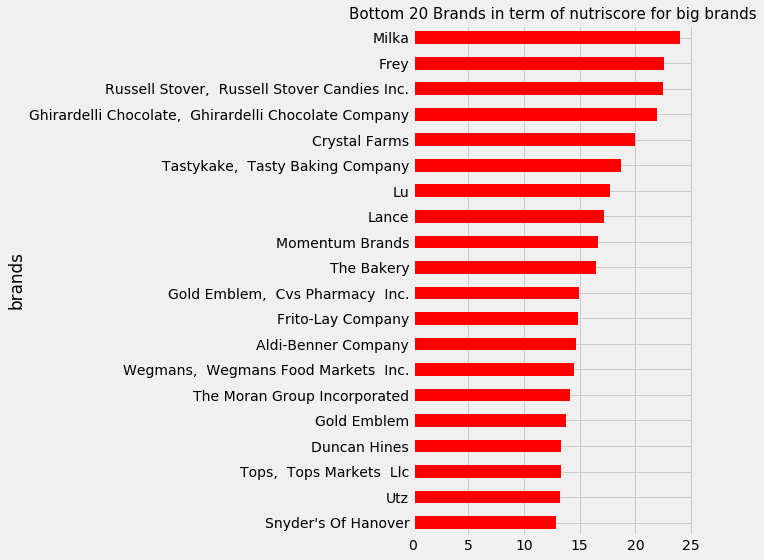

In [44]:
brand_palm_oil = df_big.groupby('brands').mean()
new = brand_palm_oil['nutrition_score_uk_100g'].sort_values(ascending = False).head(20)

style.use('fivethirtyeight')
ax = new.plot(x='brands',kind='barh',color='red',figsize=(10,8))
ax.invert_yaxis()
ax.legend().set_visible(False)
ax.set_title('Bottom 20 Brands in term of nutriscore for big brands',{'fontsize':15})
plt.tight_layout()
plt.show()

In [45]:
new.index
for i in new.index :
    print(i)
    print(df_study.brands.str.count(i).sum())

Milka
262.0
Frey
133.0
Russell Stover,  Russell Stover Candies Inc.
160.0
Ghirardelli Chocolate,  Ghirardelli Chocolate Company
132.0
Crystal Farms
183.0
Tastykake,  Tasty Baking Company
113.0
Lu
1554.0
Lance
381.0
Momentum Brands
117.0
The Bakery
325.0
Gold Emblem,  Cvs Pharmacy  Inc.
117.0
Frito-Lay Company
158.0
Aldi-Benner Company
340.0
Wegmans,  Wegmans Food Markets  Inc.
269.0
The Moran Group Incorporated
123.0
Gold Emblem
329.0
Duncan Hines
128.0
Tops,  Tops Markets  Llc
220.0
Utz
315.0
Snyder's Of Hanover
215.0


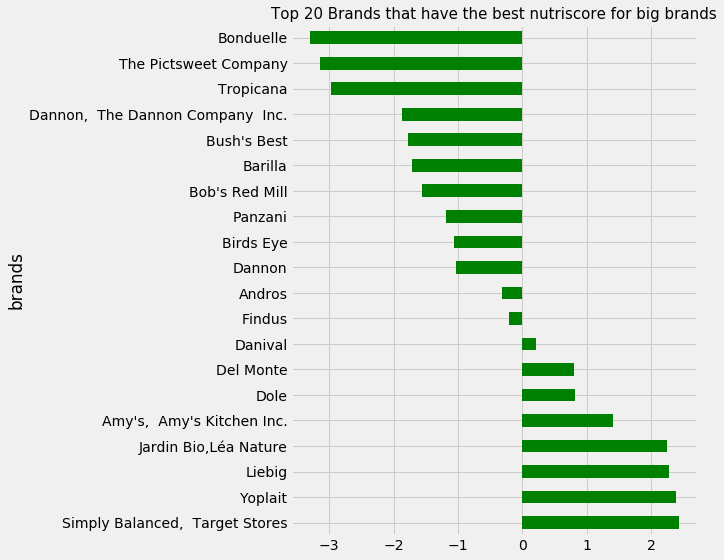

In [46]:
brand_palm_oil = df_big.groupby('brands').mean()
new = brand_palm_oil['nutrition_score_uk_100g'].sort_values(ascending = True).head(20)

style.use('fivethirtyeight')
ax = new.plot(x='brands',kind='barh',color='green',figsize=(10,8))
ax.invert_yaxis()
ax.legend().set_visible(False)
ax.set_title('Top 20 Brands that have the best nutriscore for big brands',{'fontsize':15})
plt.tight_layout()
plt.show()

In [47]:
new.index
for i in new.index :
    print(i)
    print(df_study.brands.str.count(i).sum())

Bonduelle
256.0
The Pictsweet Company
137.0
Tropicana
184.0
Dannon,  The Dannon Company  Inc.
107.0
Bush's Best
174.0
Barilla
444.0
Bob's Red Mill
370.0
Panzani
229.0
Birds Eye
181.0
Dannon
419.0
Andros
268.0
Findus
231.0
Danival
137.0
Del Monte
572.0
Dole
318.0
Amy's,  Amy's Kitchen Inc.
163.0
Jardin Bio,Léa Nature
113.0
Liebig
134.0
Yoplait
318.0
Simply Balanced,  Target Stores
105.0


### For medium brands

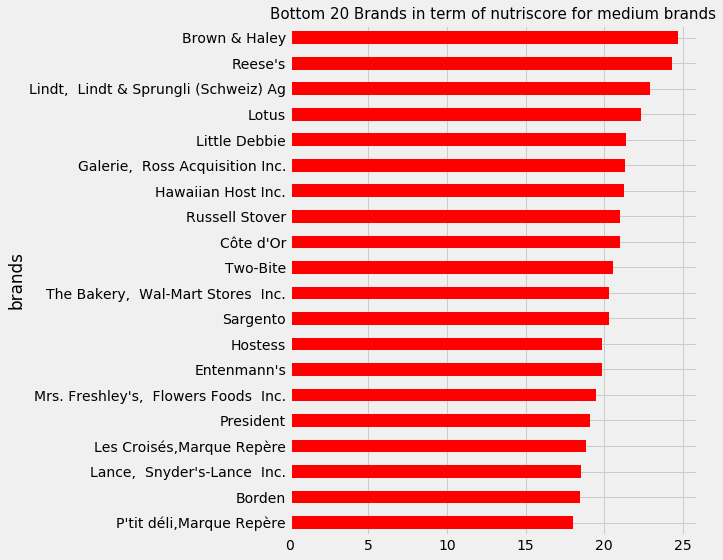

In [48]:
brand_palm_oil = df_medium.groupby('brands').mean()
new = brand_palm_oil['nutrition_score_uk_100g'].sort_values(ascending = False).head(20)

style.use('fivethirtyeight')
ax = new.plot(x='brands',kind='barh',color='red',figsize=(10,8))
ax.invert_yaxis()
ax.legend().set_visible(False)
ax.set_title('Bottom 20 Brands in term of nutriscore for medium brands',{'fontsize':15})
plt.tight_layout()
plt.show()

In [49]:
new.index
for i in new.index :
    print(i)
    print(df_study.brands.str.count(i).sum())

Brown & Haley
53.0
Reese's
70.0
Lindt,  Lindt & Sprungli (Schweiz) Ag
0.0
Lotus
107.0
Little Debbie
130.0
Galerie,  Ross Acquisition Inc.
68.0
Hawaiian Host Inc.
57.0
Russell Stover
428.0
Côte d'Or
109.0
Two-Bite
78.0
The Bakery,  Wal-Mart Stores  Inc.
99.0
Sargento
205.0
Hostess
123.0
Entenmann's
85.0
Mrs. Freshley's,  Flowers Foods  Inc.
84.0
President
85.0
Les Croisés,Marque Repère
86.0
Lance,  Snyder's-Lance  Inc.
60.0
Borden
229.0
P'tit déli,Marque Repère
77.0


In this first ranking, that represent the worst brand in term of health, we see that most of the brands are coffee brands, or snack brands. It seems logic that coffee is not considered healthy, and that the brands creating coffee are at the bottom of our ranking.

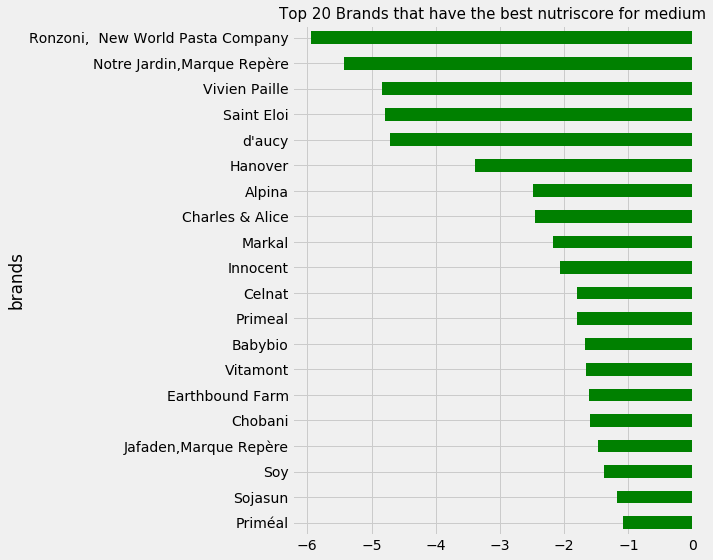

In [50]:
brand_palm_oil = df_medium.groupby('brands').mean()
new = brand_palm_oil['nutrition_score_uk_100g'].sort_values(ascending = True).head(20)

style.use('fivethirtyeight')
ax = new.plot(x='brands',kind='barh',color='green',figsize=(10,8))
ax.invert_yaxis()
ax.legend().set_visible(False)
ax.set_title('Top 20 Brands that have the best nutriscore for medium',{'fontsize':15})
plt.tight_layout()
plt.show()

In [51]:
new.index
for i in new.index :
    print(i)
    print(df_study.brands.str.count(i).sum())

Ronzoni,  New World Pasta Company
63.0
Notre Jardin,Marque Repère
112.0
Vivien Paille
53.0
Saint Eloi
97.0
d'aucy
55.0
Hanover
358.0
Alpina
104.0
Charles & Alice
73.0
Markal
120.0
Innocent
57.0
Celnat
62.0
Primeal
99.0
Babybio
92.0
Vitamont
53.0
Earthbound Farm
119.0
Chobani
194.0
Jafaden,Marque Repère
63.0
Soy
168.0
Sojasun
77.0
Priméal
84.0


### For small brands

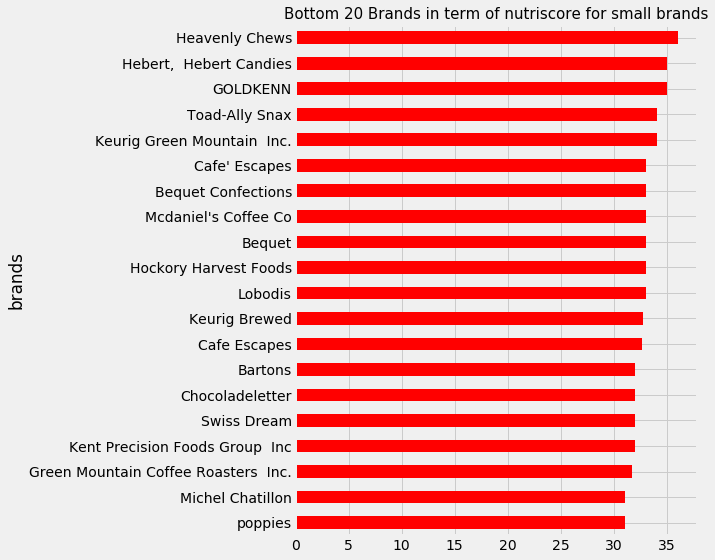

In [52]:
brand_palm_oil = df_small.groupby('brands').mean()
new = brand_palm_oil['nutrition_score_uk_100g'].sort_values(ascending = False).head(20)

style.use('fivethirtyeight')
ax = new.plot(x='brands',kind='barh',color='red',figsize=(10,8))
ax.invert_yaxis()
ax.legend().set_visible(False)
ax.set_title('Bottom 20 Brands in term of nutriscore for small brands',{'fontsize':15})
plt.tight_layout()
plt.show()

In [53]:
new.index
for i in new.index :
    print(i)
    print(df_study.brands.str.count(i).sum())

Heavenly Chews
2.0
Hebert,  Hebert Candies
1.0
GOLDKENN
1.0
Toad-Ally Snax
4.0
Keurig Green Mountain  Inc.
1.0
Cafe' Escapes
1.0
Bequet Confections
2.0
Mcdaniel's Coffee Co
1.0
Bequet
3.0
Hockory Harvest Foods
1.0
Lobodis
4.0
Keurig Brewed
4.0
Cafe Escapes
5.0
Bartons
2.0
Chocoladeletter
1.0
Swiss Dream
1.0
Kent Precision Foods Group  Inc
18.0
Green Mountain Coffee Roasters  Inc.
9.0
Michel Chatillon
1.0
poppies
1.0


### Brand with palm oil 

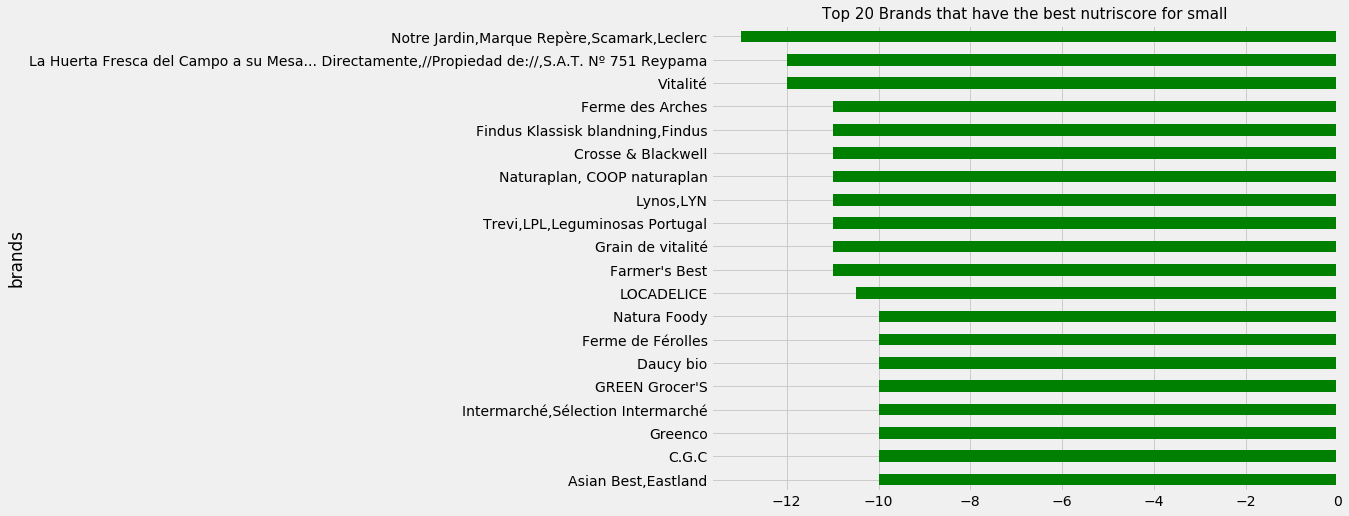

In [54]:
brand_palm_oil = df_small.groupby('brands').mean()
new = brand_palm_oil['nutrition_score_uk_100g'].sort_values(ascending = True).head(20)

style.use('fivethirtyeight')
ax = new.plot(x='brands',kind='barh',color='green',figsize=(10,8))
ax.invert_yaxis()
ax.legend().set_visible(False)
ax.set_title('Top 20 Brands that have the best nutriscore for small',{'fontsize':15})
plt.tight_layout()
plt.show()

In [55]:
new.index
for i in new.index :
    print(i)
    print(df_study.brands.str.count(i).sum())

Notre Jardin,Marque Repère,Scamark,Leclerc
1.0
La Huerta Fresca del Campo a su Mesa... Directamente,//Propiedad de://,S.A.T. Nº 751 Reypama
1.0
Vitalité
2.0
Ferme des Arches
1.0
Findus Klassisk blandning,Findus
1.0
Crosse & Blackwell
1.0
Naturaplan, COOP naturaplan
1.0
Lynos,LYN
1.0
Trevi,LPL,Leguminosas Portugal
1.0
Grain de vitalité
1.0
Farmer's Best
6.0
LOCADELICE
2.0
Natura Foody
1.0
Ferme de Férolles
1.0
Daucy bio
1.0
GREEN Grocer'S
1.0
Intermarché,Sélection Intermarché
5.0
Greenco
1.0
C.G.C
4.0
Asian Best,Eastland
1.0


At the contrary, here we have a ranking of the brands that have the mean of nutrition score the lowest, we can consider this the brands that are created healthier product.

## Ranking According to Number of Additive in Food

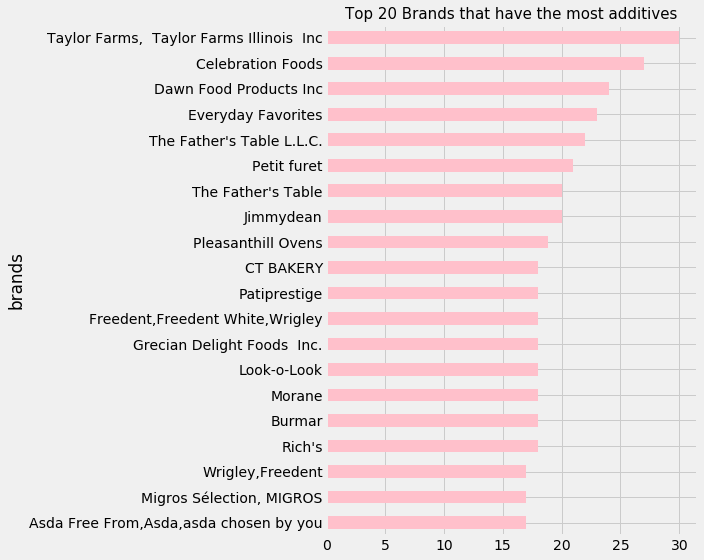

In [56]:
brand_palm_oil = df_study.groupby('brands').mean()
new = brand_palm_oil['additives_n'].sort_values(ascending = False).head(20)

style.use('fivethirtyeight')
ax = new.plot(x='brands',kind='barh',color='pink',figsize=(10,8))
ax.invert_yaxis()
ax.legend().set_visible(False)
ax.set_title('Top 20 Brands that have the most additives',{'fontsize':15})
plt.tight_layout()
plt.show()

## Palm Oil Issues

They are two type of information about palm oil, the number of ingredients that contains palm oil and the number that may contains. First, lets see the distribution of the value of this two informations.

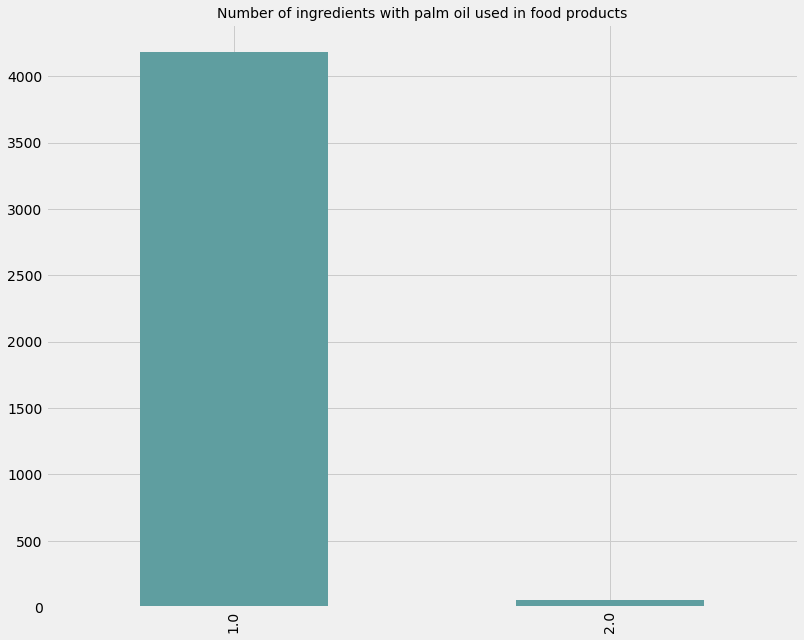

In [57]:
plt.figure(figsize=(12,10))
df_study[df_study['ingredients_from_palm_oil_n'] > 0.0]['ingredients_from_palm_oil_n'].value_counts().plot(kind='bar',color='cadetblue')
plt.title('Number of ingredients with palm oil used in food products',fontsize=14)
plt.show()

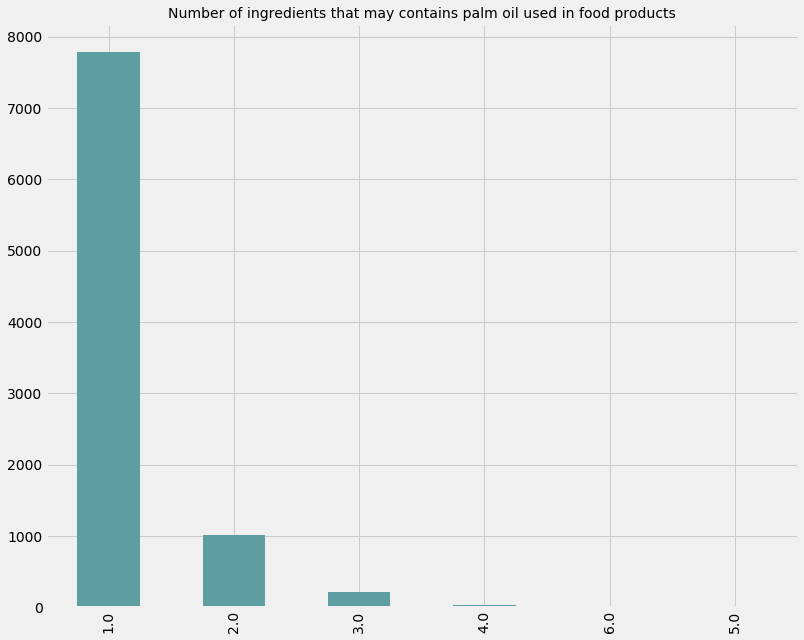

In [58]:
plt.figure(figsize=(12,10))
df_study[df_study['ingredients_that_may_be_from_palm_oil_n'] > 0.0]['ingredients_that_may_be_from_palm_oil_n'].value_counts().plot(kind='bar',color='cadetblue')
plt.title('Number of ingredients that may contains palm oil used in food products',fontsize=14)
plt.show()

### Ranking of Brands According to Palm Oil

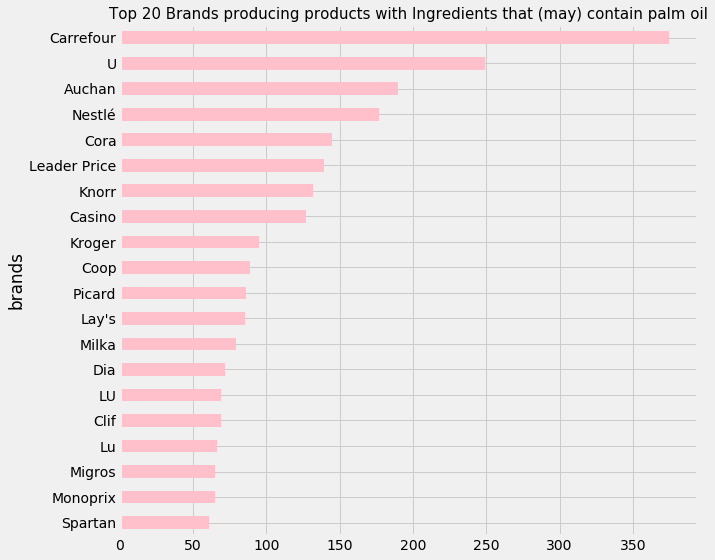

In [59]:
ingredient_palm_oil = df_study[(df_study['ingredients_from_palm_oil_n']>0.0) | (df_study['ingredients_that_may_be_from_palm_oil_n']>0.0) ]
ingredient_palm_oil
brand_palm_oil = ingredient_palm_oil.groupby('brands').size().reset_index(name='count').sort_values(by='count',ascending=False).head(20)
brand_palm_oil
style.use('fivethirtyeight')
ax = brand_palm_oil.plot(x='brands',kind='barh',color='pink',figsize=(10,8))
ax.invert_yaxis()
ax.legend().set_visible(False)
ax.set_title('Top 20 Brands producing products with Ingredients that (may) contain palm oil',{'fontsize':15})
plt.tight_layout()
plt.show()

We see that in this ranking, some brand have a lot of product with palm oil. However, we have to keep in mind that some brand have more product registers than other. So now we will do the same ranking with the mean of number of ingredients containing palm oil.

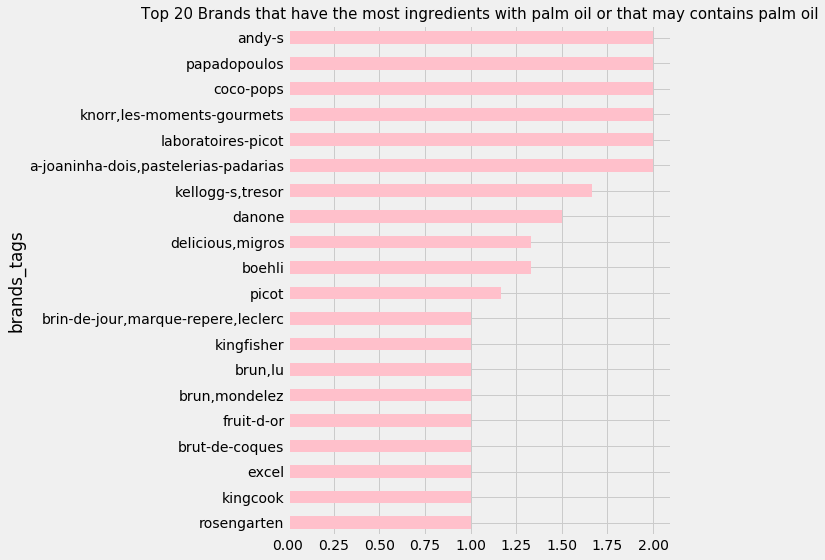

In [60]:
ingredient_palm_oil = df_study[(df_study['ingredients_from_palm_oil_n']>0.0) | (df_study['ingredients_that_may_be_from_palm_oil_n']>0.0) ]
ingredient_palm_oil
brand_palm_oil = ingredient_palm_oil.groupby('brands_tags').mean()
new = brand_palm_oil['ingredients_from_palm_oil_n'].sort_values(ascending = False).head(20)

style.use('fivethirtyeight')
ax = new.plot(x='brands',kind='barh',color='pink',figsize=(10,8))
ax.invert_yaxis()
ax.legend().set_visible(False)
ax.set_title('Top 20 Brands that have the most ingredients with palm oil or that may contains palm oil',{'fontsize':15})
plt.tight_layout()
plt.show()